#Definição atividade

Em um jupyter notebook:

Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;
- Treine um modelo da classe LinearRegression do scikit-learn com toda a base;
- Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;
- Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.
- Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).


**Dataset:** https://www.kaggle.com/kumarajarshi/life-expectancy-who
</br>
**Objetivo:** regressão linear para predição da expectativa de vida (life expectancy)

#Import dataset e tratamento básico

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt

In [2]:
#IMPORT DATASET
os.environ['KAGGLE_USERNAME'] = "xxxxxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxxx" # key from the json file
!kaggle datasets download -d kumarajarshi/life-expectancy-who

  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 46.0MB/s]


In [3]:
#UNZIP FILE
zf = zipfile.ZipFile('life-expectancy-who.zip')
zf.extractall()

In [4]:
#CREATES A DATAFRAME
df = pd.read_csv("Life Expectancy Data.csv")
#Drop the Rows with NaN Values
df = df.dropna()

In [5]:
X =  df[["Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Hepatitis B",
       "Measles ", " BMI ", "under-five deaths ", "Polio", "Total expenditure",
       "Diphtheria ", " HIV/AIDS", "GDP", "Population",
       " thinness  1-19 years", " thinness 5-9 years",
       "Income composition of resources", "Schooling"]]

X.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
print(X.shape)

(1649, 18)


In [7]:
y = df[["Life expectancy "]]

#Treino modelo LinearRegression do scikit-learn com toda a base

In [8]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)


#Cálculo do MSE para todos os exemplos da usada como treino no modelo treinado


In [9]:
##Comentário do professor: "Outro ponto é se o "mse" deve ser calculado para cada amostra ou de uma forma global comparando o "y" e o "ypred" do conjunto." Global.
print(mean_squared_error(y, ypred))

#print(modelo.intercept_, #bias
#      modelo.coef_ #coeficientes
#     )

12.780950863918688


#Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

In [11]:
bias = modelo.intercept_
bias

array([53.28155902])

In [12]:
#faixa_bias = np.linspace(bias-10, bias+10, 18)
#faixa_bias

array([[43.28155902],
       [44.45802961],
       [45.6345002 ],
       [46.81097078],
       [47.98744137],
       [49.16391196],
       [50.34038255],
       [51.51685314],
       [52.69332373],
       [53.86979431],
       [55.0462649 ],
       [56.22273549],
       [57.39920608],
       [58.57567667],
       [59.75214726],
       [60.92861784],
       [62.10508843],
       [63.28155902]])

In [13]:
#coef = modelo.coef_.transpose()
#coef

array([[-1.68885302e-02],
       [ 9.36938378e-02],
       [-5.43483450e-02],
       [ 3.77682623e-04],
       [-5.58249970e-03],
       [-8.61733822e-06],
       [ 3.34980599e-02],
       [-7.04701961e-02],
       [ 7.83637889e-03],
       [ 7.97522211e-02],
       [ 1.43889187e-02],
       [-4.38298048e-01],
       [ 1.38327405e-05],
       [-6.91652453e-10],
       [-8.67022868e-03],
       [-5.12278224e-02],
       [ 9.82414672e+00],
       [ 8.78334955e-01]])

In [14]:
class regressao_linear():
  #construtor
  def __init__(self):  
    self.w = np.zeros((19,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias,X),axis=1)
    return X_b
    
  def fit(self, X,y):
    X_b = self.addBias(X)
    
    for _ in range(500):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.w = self.w - 0.1*ajuste 

  def predict(self, X):
    X_b = self.addBias(X)
    #y = self.w[1]*X[1] + self.w[0]*X[0]
    y = X_b.dot(self.w)
    return y

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(bias-1000, bias+1000, 18)
w1 = modelo.coef_

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] = mse
  return Erro

In [16]:
W0,W1 = np.meshgrid(w0,w1)
Erro = z_function(W0, W1)

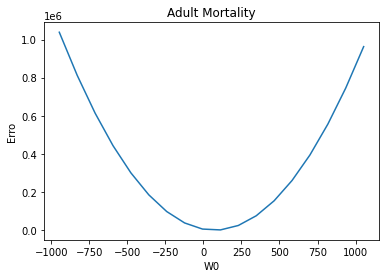

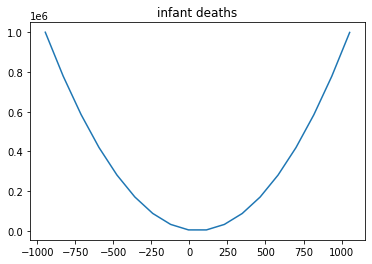

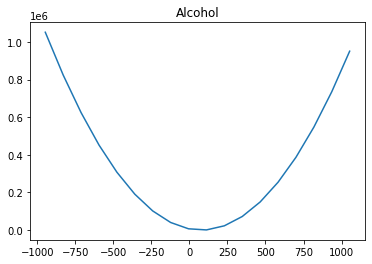

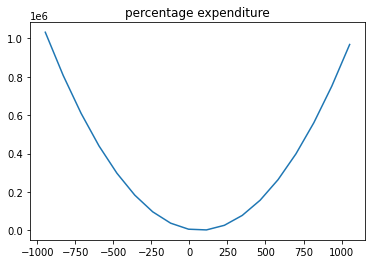

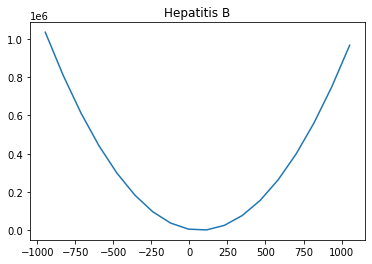

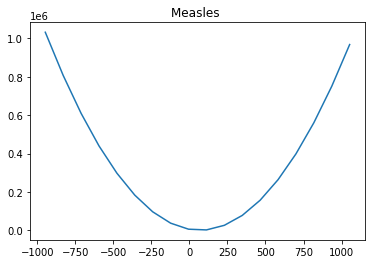

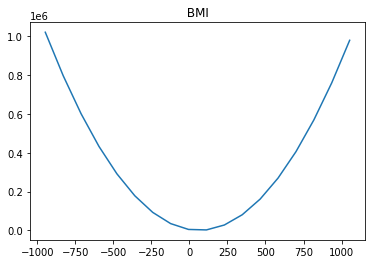

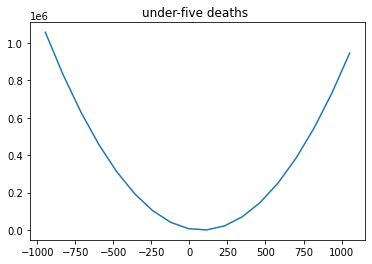

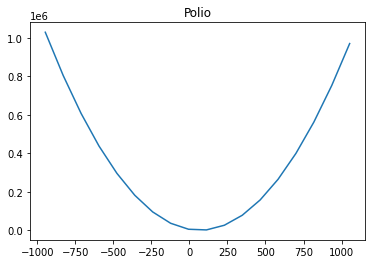

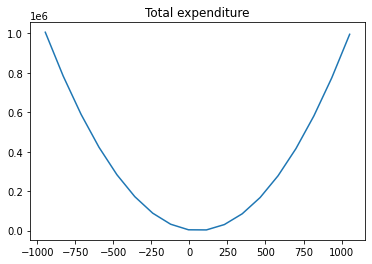

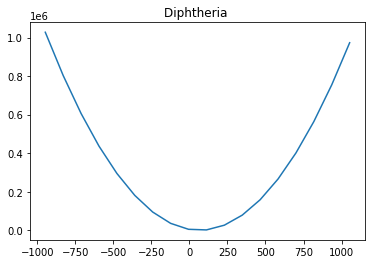

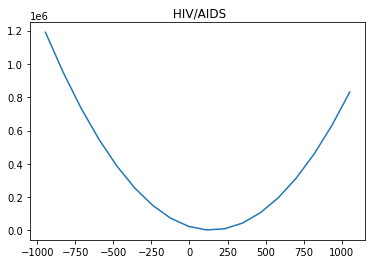

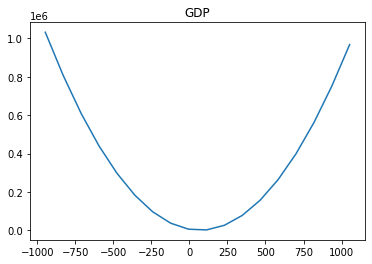

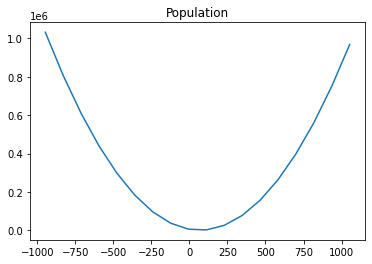

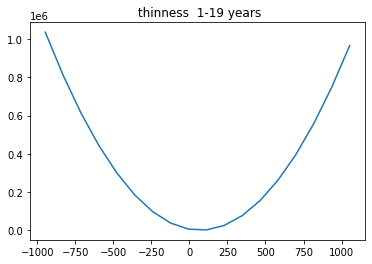

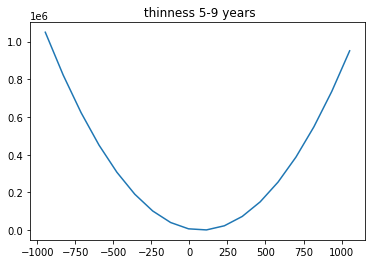

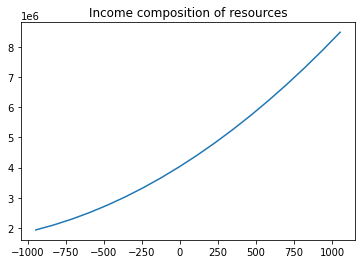

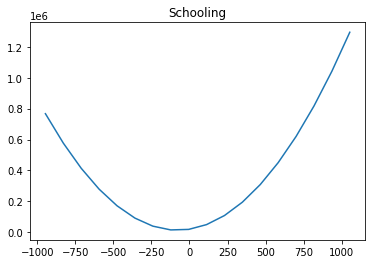

In [17]:
plt.ylabel("Erro")
plt.xlabel("W0")
#Um plot para cada feature
for i in range(18):
  plt.plot(W0[i,:], Erro[i,:])
  plt.title(X.columns[i])
  plt.show()